In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_zarr('Pspacetime_001.zarr/')

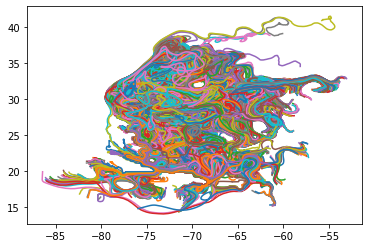

In [3]:
plt.plot(ds.lon.T, ds.lat.T)
plt.show()

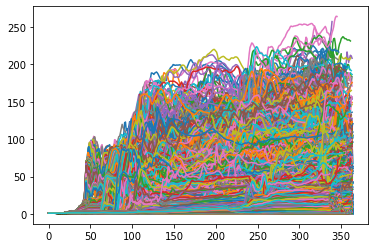

In [4]:
plt.plot(ds.z.T)
plt.show()

In [ ]:
ds = {}
for member in range(1, 10):
    ds[member] = xr.open_zarr(f'Pensemble_{member:03d}.zarr/')
npart = ds[1].lon.shape[0]
nmembers = len(ds)
print(ds)

In [ ]:
plt.plot(ds.lon.T, ds.lat.T)
plt.show()

In [ ]:
plt.plot(ds[1].z.T)
plt.plot()

In [ ]:
for member in ds:
    plt.plot(ds[member].lon[1000, :].T, ds[member].lat[1000, :].T)

In [ ]:
# u = {}
# for member in range(1, 4):
#     u[member] = xr.open_dataset(f"/storage/shared/oceanparcels/input_data/NEMO_Ensemble/NATL025-CJMCYC3.{member:03d}-S/1d/2010/NATL025-CJMCYC3.{member:03d}_y2010m01.1d_gridU.nc")

In [ ]:
endlon = np.zeros((npart, nmembers))
endlat = np.zeros((npart, nmembers))
startlon = np.zeros((npart, nmembers))
startdepth = np.zeros((npart, nmembers))
for i, member in enumerate(ds):
    endlon[:, i] = ds[member].lon[:, -6]
    startlon[:, i] = ds[member].lon[:, 0]
    endlat[:, i] = ds[member].lat[:, -6]
    startdepth[:, i] = ds[member].z[:, 0]


In [ ]:
# plt.pcolormesh(np.hypot(endlon, endlat))
deps = np.arange(0, 5500, 1000)
for z in deps:
    I = np.where(abs(startdepth -z)< 10)[0]
    plt.scatter(ds[1].lon[I, 0], ds[1].lat[I, 0], 
                c=np.hypot(np.std(endlon[I], axis=1), np.std(endlat[I], axis=1)), 
                s=5, vmax=10)
    plt.colorbar()
    plt.show()

In [ ]:
plt.scatter(endlon, endlat, c=startdepth, s=2)
plt.show()

In [ ]:
plt.pcolormesh((mask.fmask)[0, 0, :, :])
plt.colorbar()